Import Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

Import Dataset

In [31]:
names = ["ID", "Entity", "Reactions", "Notes"]
df = pd.read_csv("twitter_training.csv", names=names)
df.head()

,ID,Entity,Reactions,Notes
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Preprocessing Dataset

In [32]:
df.isnull().sum()

ID             0
Entity         0
Reactions      0
Notes        686
dtype: int64

In [33]:
df.dropna(inplace=True)
df.isnull().sum()

ID           0
Entity       0
Reactions    0
Notes        0
dtype: int64

In [34]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         73996 non-null  int64 
 1   Entity     73996 non-null  object
 2   Reactions  73996 non-null  object
 3   Notes      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


In [38]:
reaction = df["Reactions"].value_counts()
reaction

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: Reactions, dtype: int64

Visualize Reactions

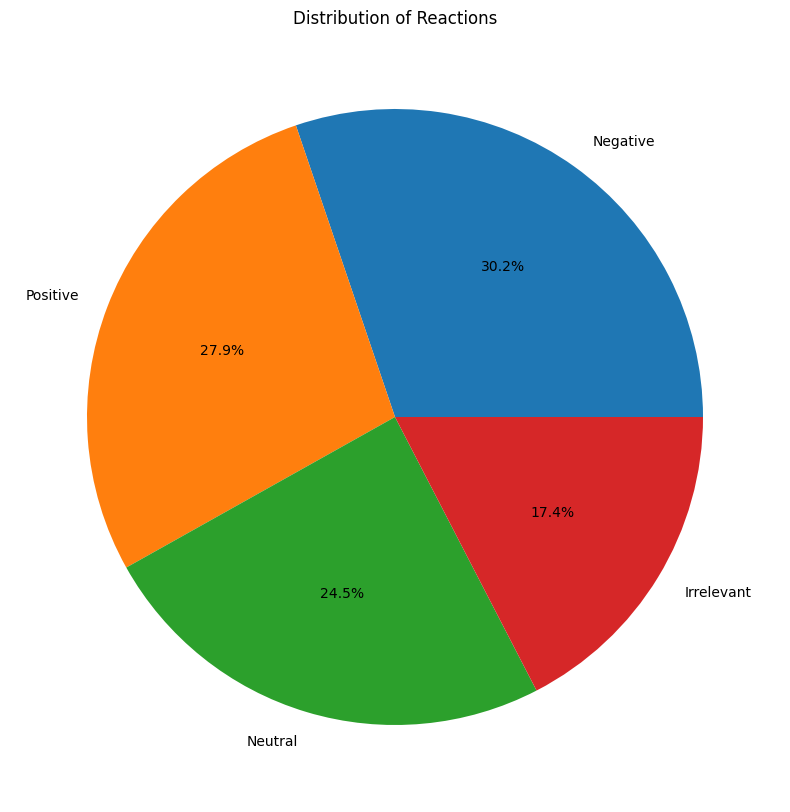

In [67]:
plt.figure(figsize=(10, 10))
plt.pie(reaction, labels=reaction.index, autopct='%1.1f%%')
plt.title("Distribution of Reactions")
plt.show()

In [40]:
entity = df["Entity"].value_counts()
entity

MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                       

In [41]:
entity_head = df["Entity"].value_counts().sort_values(ascending=False)[:5]
entity_head

MaddenNFL               2377
LeagueOfLegends         2377
CallOfDuty              2376
Verizon                 2365
TomClancysRainbowSix    2364
Name: Entity, dtype: int64

In [44]:
# Calculate sentiment counts for each entity
reaction_counts = df.groupby(["Entity", "Reactions"]).size().unstack(fill_value=0)

# Summing Up sentiment counts for each entity
entity_reaction_counts = reaction_counts.groupby('Entity').sum()

# Calculate total sentiment counts for each entity
entity_total_reactions = entity_reaction_counts.sum(axis=1)

# Select top 5 entities based on total sentiment counts
entities_head5 = entity_total_reactions.nlargest(5).index

# Filter sentiment counts for top 5 entities
entity_reactions_head5 = entity_reaction_counts.loc[top_5_entities]


<Figure size 1000x1000 with 0 Axes>

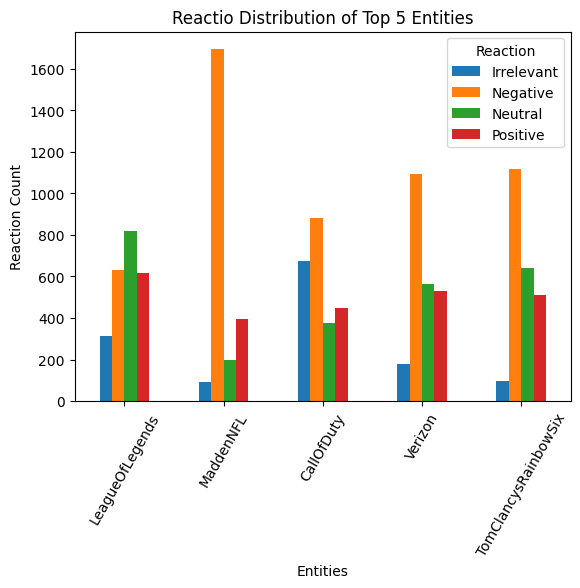

In [66]:
plt.figure(figsize=(10, 10))
entity_reactions_head5.plot(kind="bar")
plt.xlabel("Entities")
plt.ylabel("Reaction Count")
plt.title("Reactio Distribution of Top 5 Entities")
plt.legend(title="Reaction")
plt.xticks(rotation=60)
plt.show()

In [58]:
entity_data = df[df["Entity"] == "Google"]

reaction_counts = entity_data["Reactions"].value_counts()



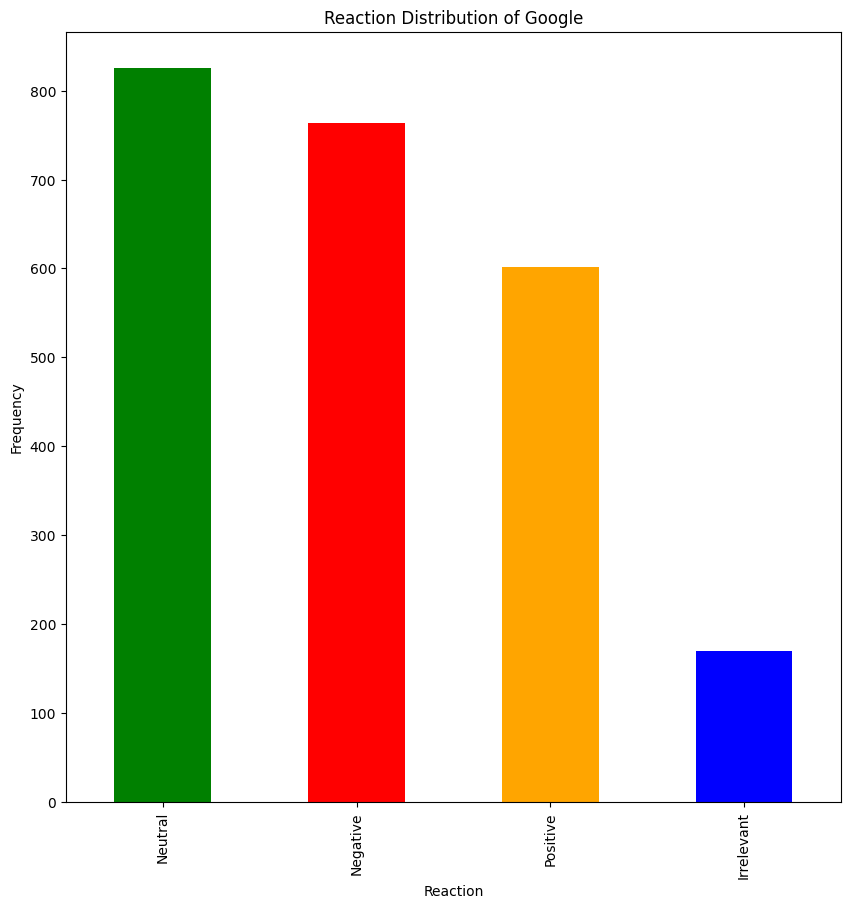

In [65]:
plt.figure(figsize=(10, 10))
reaction_counts.plot(kind="bar", color=["green", "red", "orange", "blue"])
plt.xlabel("Reaction")
plt.ylabel("Frequency")
plt.title("Reaction Distribution of Google")
plt.show()

In [60]:
entity_data = df[df["Entity"] == "Microsoft"]

# Count occurrences of each sentiment category
reaction_counts = entity_data["Reactions"].value_counts()


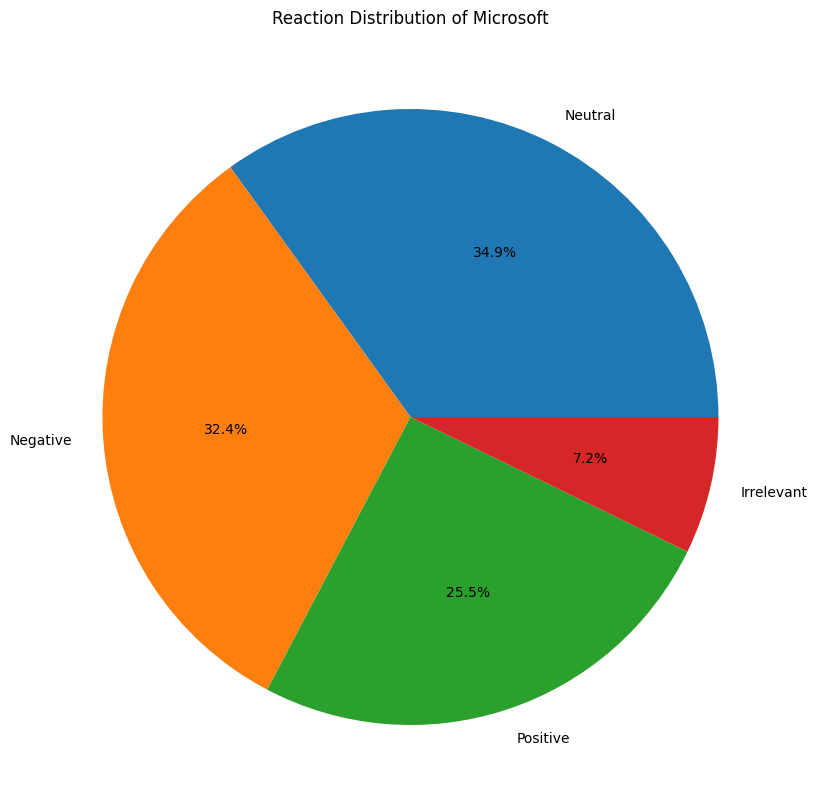

In [69]:
plt.figure(figsize=(10, 10))
labels = reaction_counts.index 
plt.pie(reaction_counts, labels=labels, autopct='%1.1f%%')
plt.title("Reaction Distribution of Microsoft")
plt.show()